In [1922]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
%matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans thonny


In [1923]:

csv_file1 = r"Y:\Documents\temp16122022.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [1924]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,-2.11
1,-1.33
2,-0.07
3,0.36
4,0.39
...,...
10992,12.35
10993,12.90
10994,13.85
10995,14.71


In [1925]:
date_time_str = '16/12/22 9:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2022, 12, 16, 9, 0)

In [1926]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2022, 12, 16, 9, 0), datetime.datetime(2024, 3, 18, 14, 0))

In [1927]:
len(data)

10997

In [1928]:
def mk_date(date_time_str,data):
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))

In [1929]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19342.375     , 19342.41666667, 19342.45833333, ...,
       19800.45833333, 19800.5       , 19800.54166667])

In [1930]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [1931]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [1932]:
data[['dates','temp']]

,dates,temp
0,16/12/22 09:00:00,-2.11
1,16/12/22 10:00:00,-1.33
2,16/12/22 11:00:00,-0.07
3,16/12/22 12:00:00,0.36
4,16/12/22 13:00:00,0.39
...,...,...
10992,18/03/24 09:00:00,12.35
10993,18/03/24 10:00:00,12.90
10994,18/03/24 11:00:00,13.85
10995,18/03/24 12:00:00,14.71


In [1933]:
import warnings
warnings.filterwarnings("ignore")


In [1934]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(        temp         hours              dates
 0      -2.11  19342.375000  16/12/22 09:00:00
 1      -1.33  19342.416667  16/12/22 10:00:00
 2      -0.07  19342.458333  16/12/22 11:00:00
 3       0.36  19342.500000  16/12/22 12:00:00
 4       0.39  19342.541667  16/12/22 13:00:00
 ...      ...           ...                ...
 10992  12.35  19800.375000  18/03/24 09:00:00
 10993  12.90  19800.416667  18/03/24 10:00:00
 10994  13.85  19800.458333  18/03/24 11:00:00
 10995  14.71  19800.500000  18/03/24 12:00:00
 10996  15.78  19800.541667  18/03/24 13:00:00
 
 [10997 rows x 3 columns],
 10997)

In [1935]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [1936]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

-0.9458333333333133

In [1937]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

10973

In [1938]:
len(x)

10973

In [1939]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

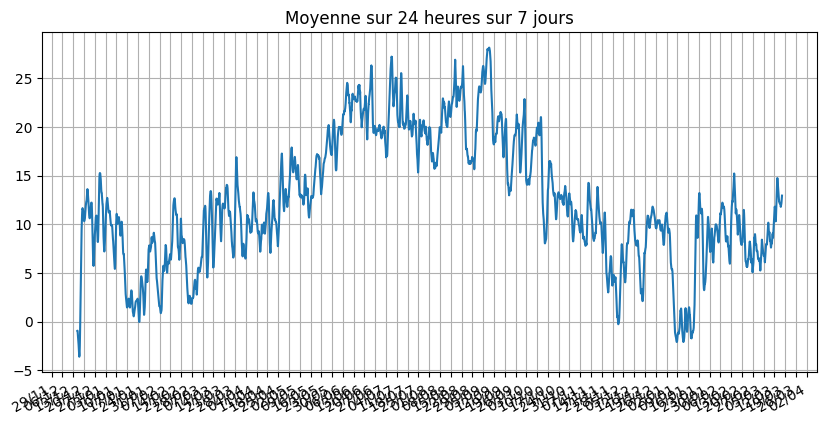

In [1940]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [1941]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=458, seconds=14967, microseconds=261360)

In [1942]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [1943]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2022, 12, 16, 9, 0),
 datetime.datetime(2024, 3, 18, 13, 9, 27, 261360),
 458)

In [1944]:
moyenne = data['temp'].mean()
moyenne

12.310241884147516

12.310241884147516

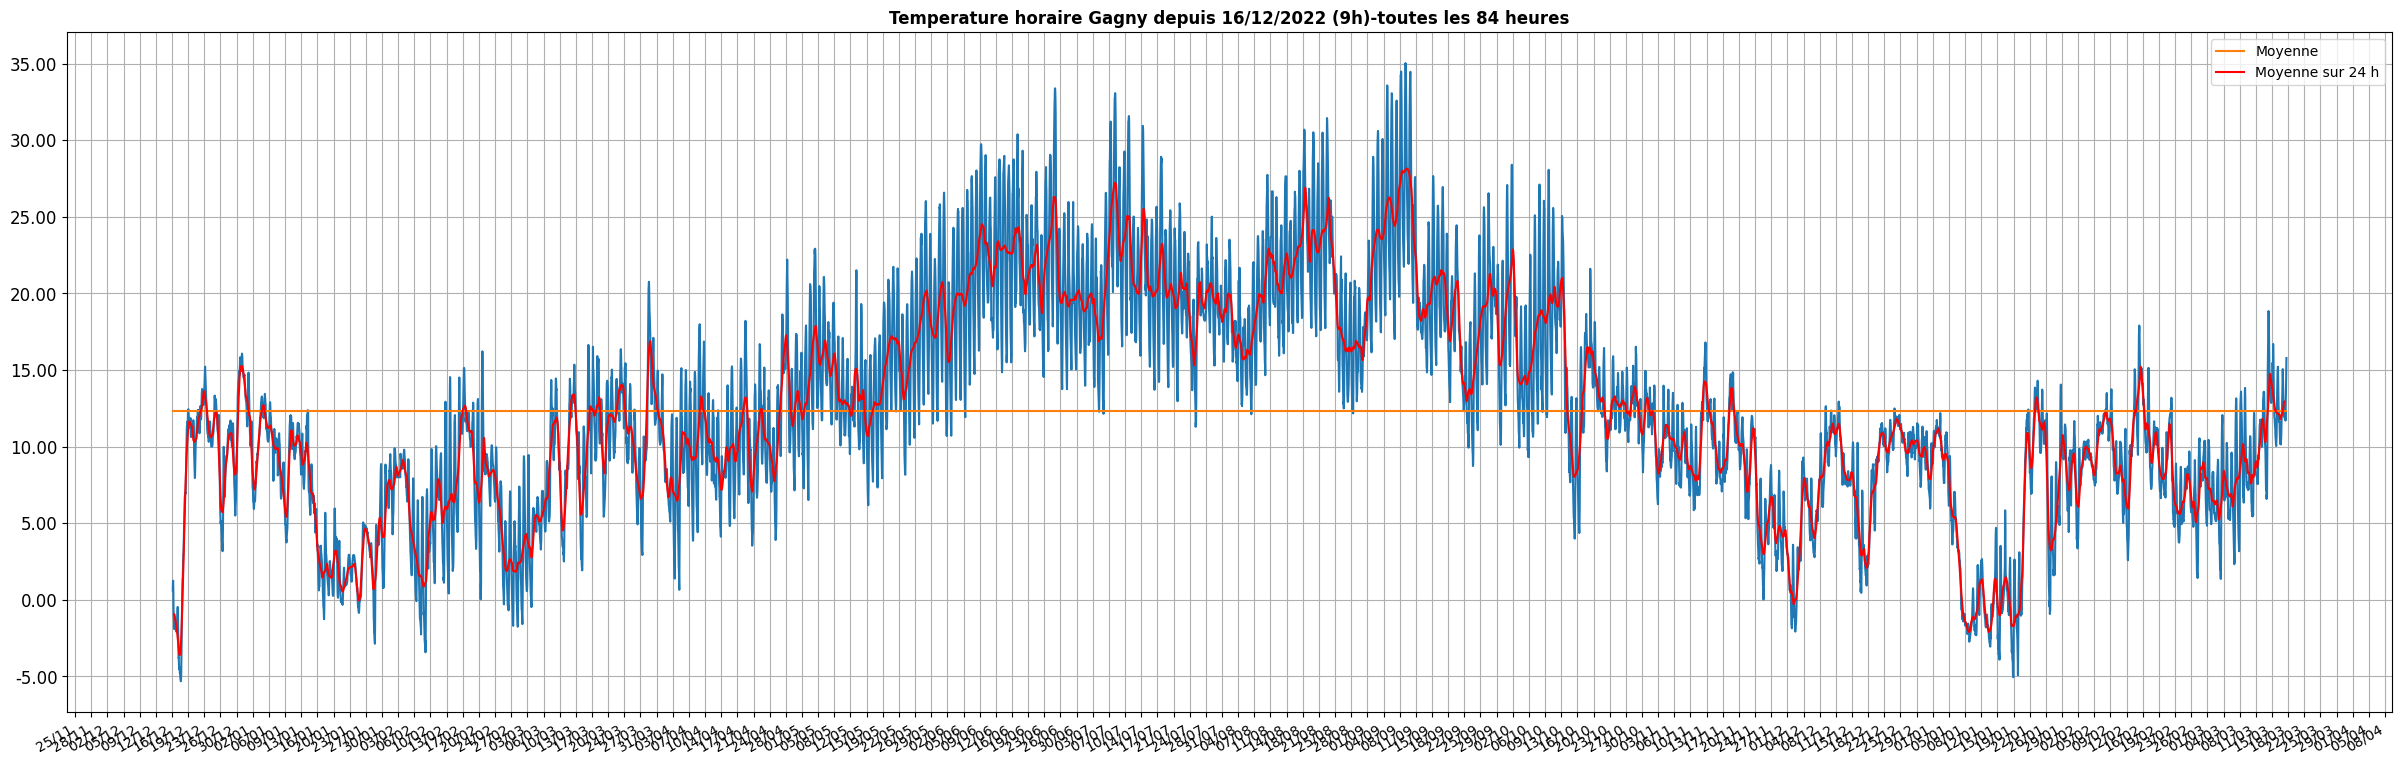

In [1945]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [1946]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,-2.11,19342.375000,16/12/22 09:00:00,NaN
1,-1.33,19342.416667,16/12/22 10:00:00,0.78
2,-0.07,19342.458333,16/12/22 11:00:00,1.26
3,0.36,19342.500000,16/12/22 12:00:00,0.43
4,0.39,19342.541667,16/12/22 13:00:00,0.03
...,...,...,...,...
10992,12.35,19800.375000,18/03/24 09:00:00,0.65
10993,12.90,19800.416667,18/03/24 10:00:00,0.55
10994,13.85,19800.458333,18/03/24 11:00:00,0.95
10995,14.71,19800.500000,18/03/24 12:00:00,0.86


<Axes: >

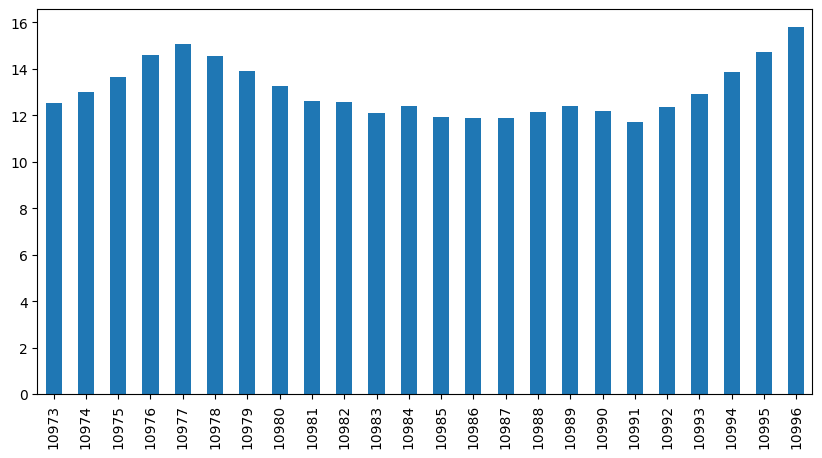

In [1947]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

<Axes: ylabel='Density'>

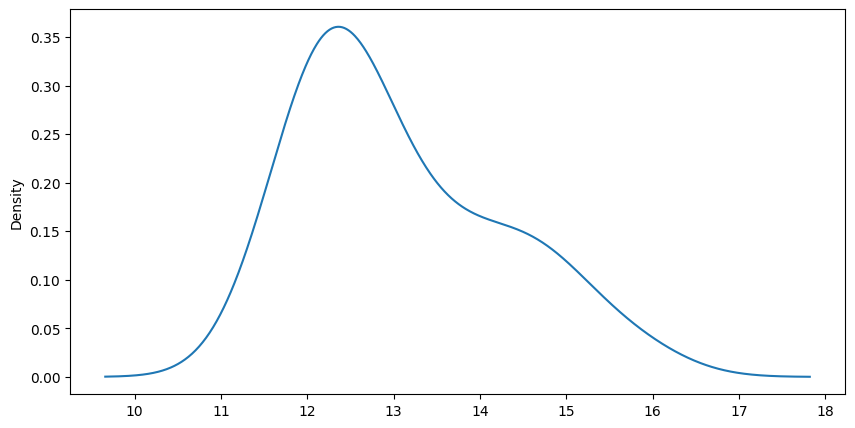

In [1948]:
data.tail(24)['temp'].plot.kde(figsize=(10,5))

<Axes: ylabel='Frequency'>

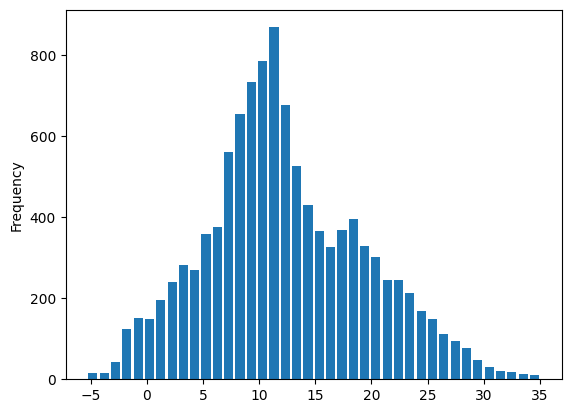

In [1949]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

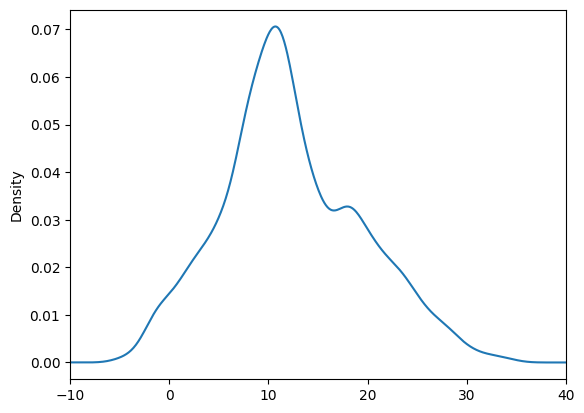

In [1950]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

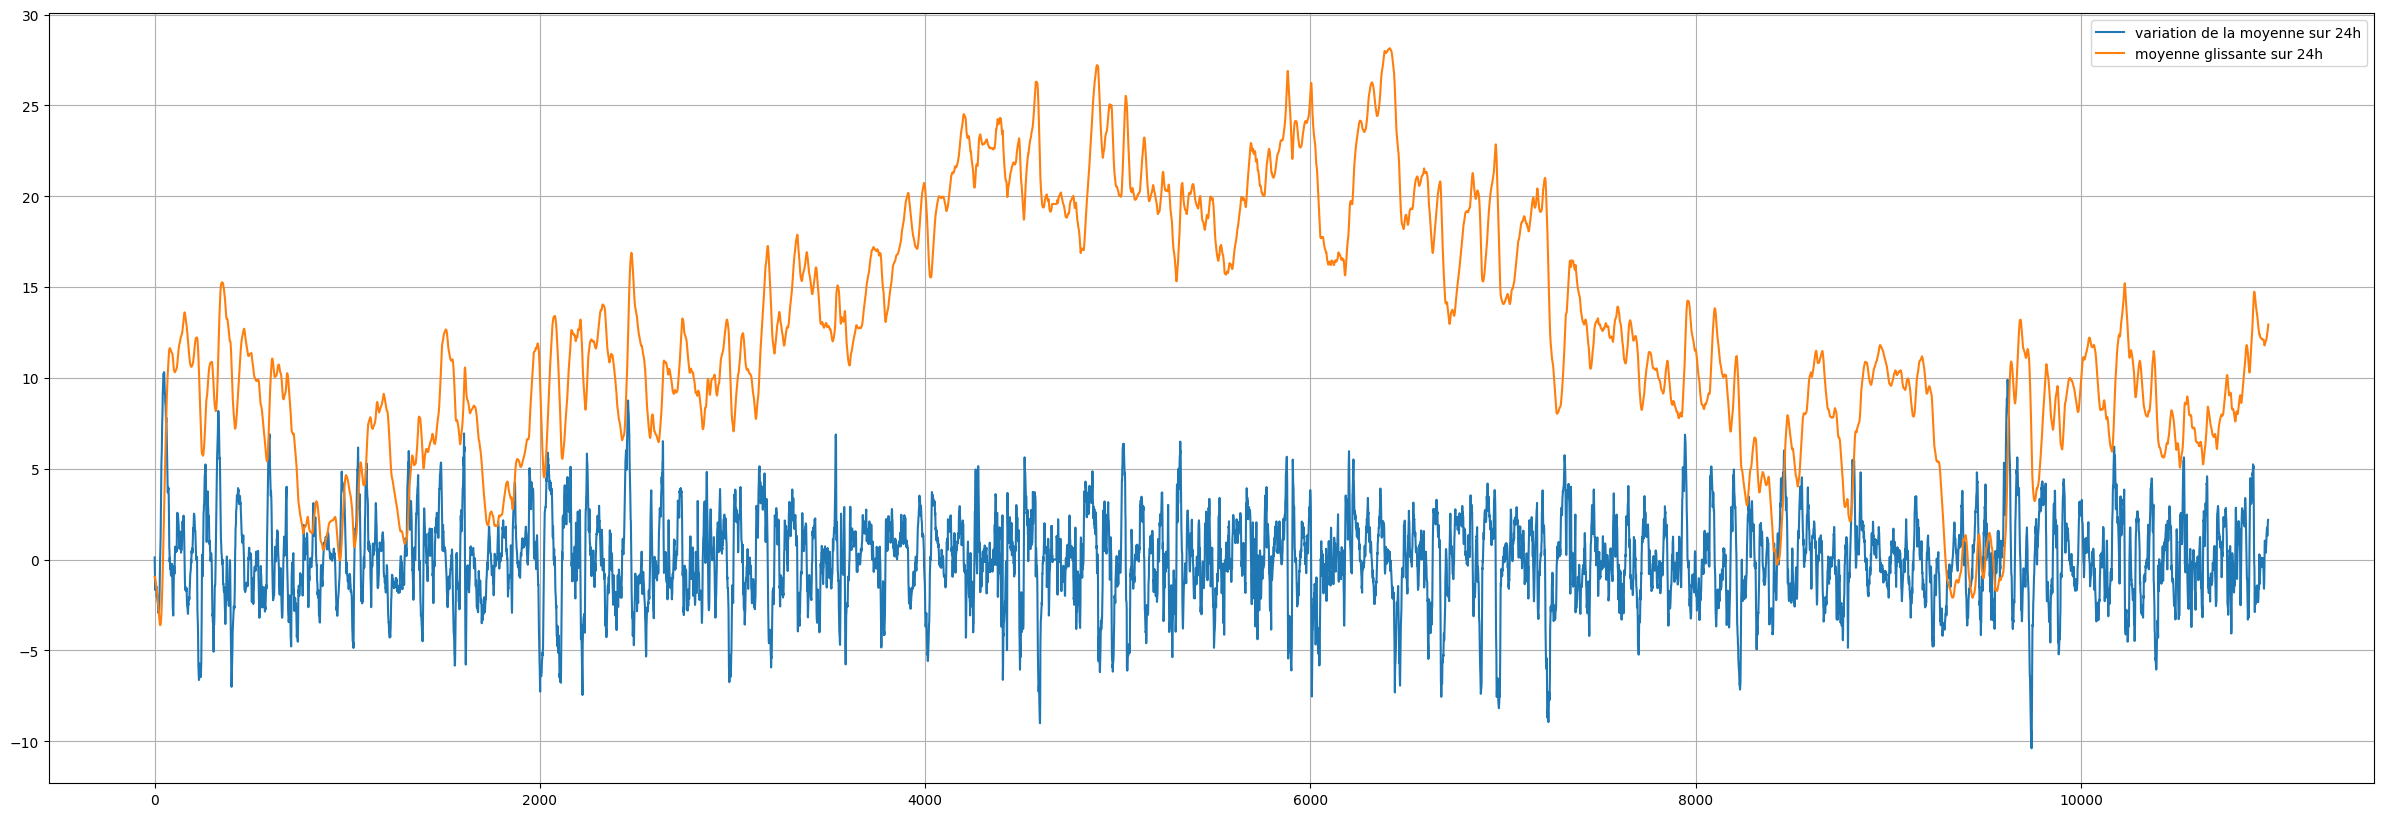

In [1951]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [1952]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [1953]:
window, days, interval

(24, 15, 12)

In [1954]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [1955]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

9.626222222222244

In [1956]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 9.626222222222244)

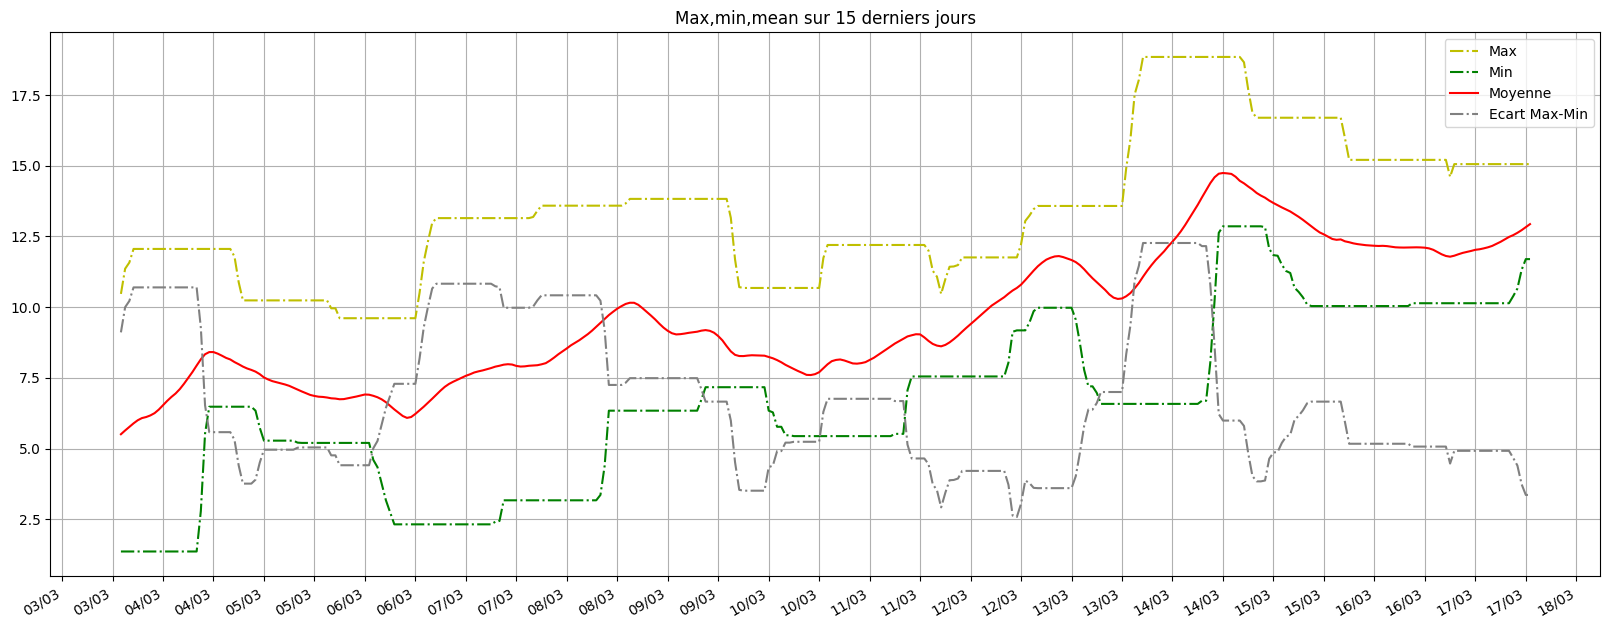

In [1957]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [1958]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

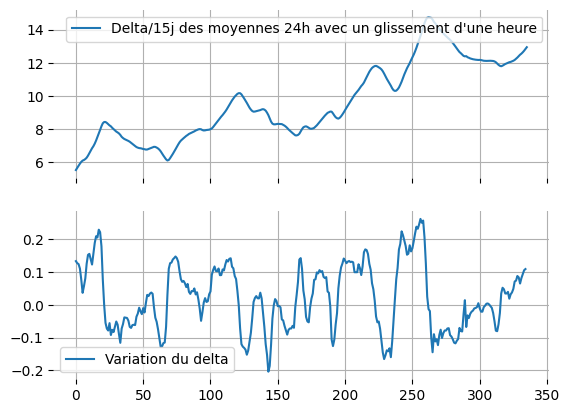

In [1959]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [1960]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [1961]:
# graphical output...
from pylab import sign, diff


In [1962]:
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


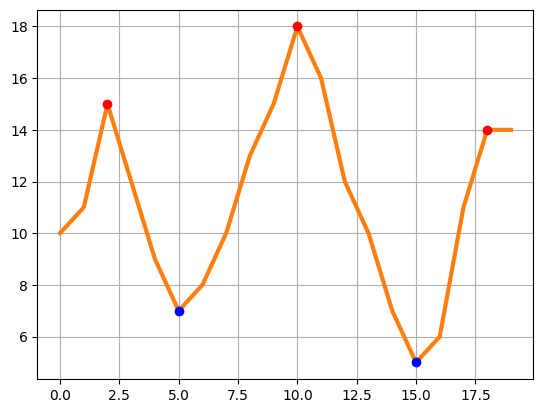

In [1963]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [1964]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data.tail(24*jours)[['heures','temp','variation']]

,heures,temp,variation
10829,14,12.00,-0.20
10830,15,11.29,-0.71
10831,16,11.08,-0.21
10832,17,9.79,-1.29
10833,18,9.30,-0.49
...,...,...,...
10992,09,12.35,0.65
10993,10,12.90,0.55
10994,11,13.85,0.95
10995,12,14.71,0.86


In [1965]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [1966]:
_max - _min

12.270000000000001

## Main graph

(9.626222222222244, 15)

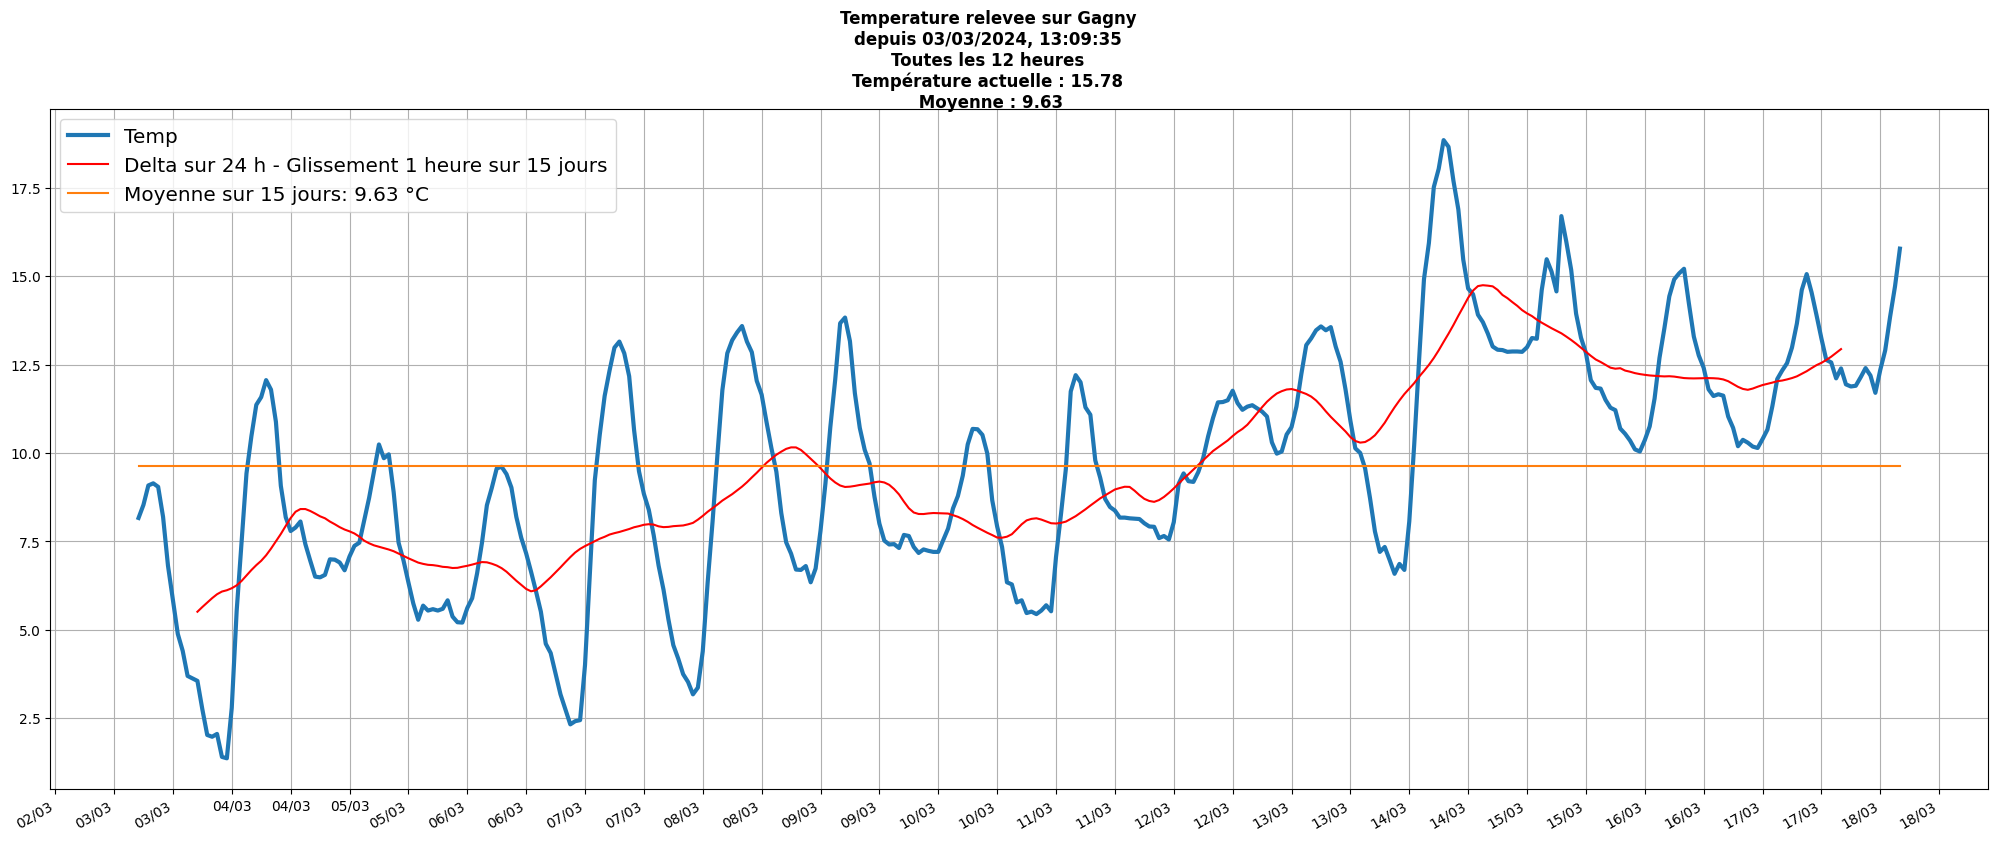

In [1967]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [1968]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
10992,09,12.35,0.65
10993,10,12.90,0.55
10994,11,13.85,0.95
10995,12,14.71,0.86
10996,13,15.78,1.07


In [1969]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,0.1)

0.05

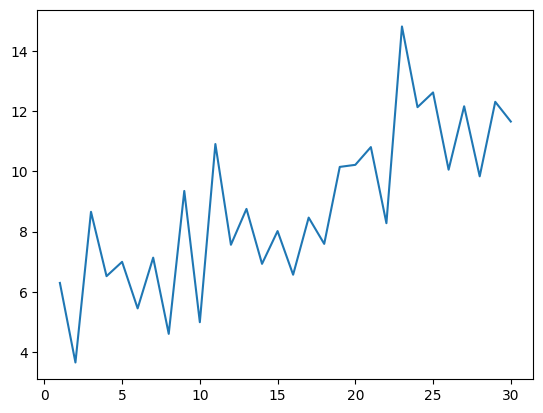

In [1970]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

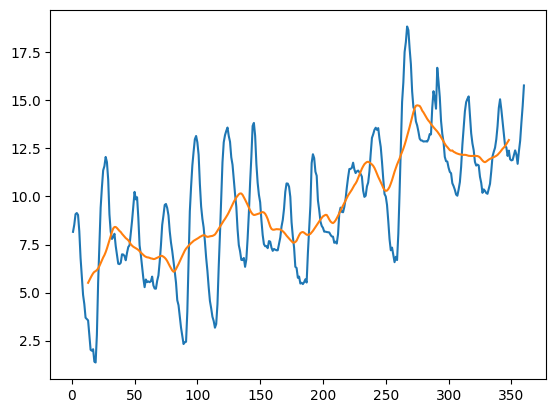

In [1971]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x2a0ef922290>])

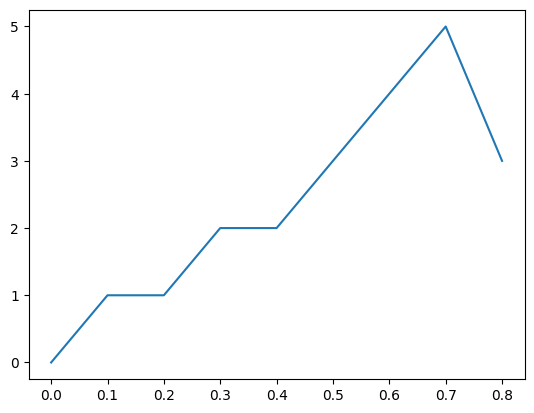

In [1972]:
df = [0,1,1,2,2,3,4,5,3]
dx = 0.1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x2a0ef9da450>])

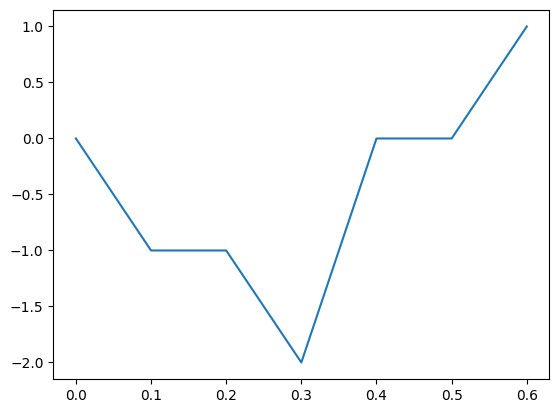

In [1973]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

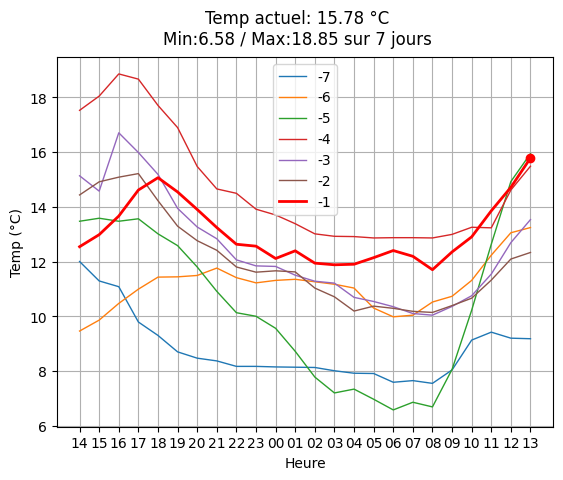

In [1974]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots()
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"Temp actuel: {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel("Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()

In [1975]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
ext  # create an error


NameError: name 'ext' is not defined

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
dir(list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

# how to label on top of a bar plot

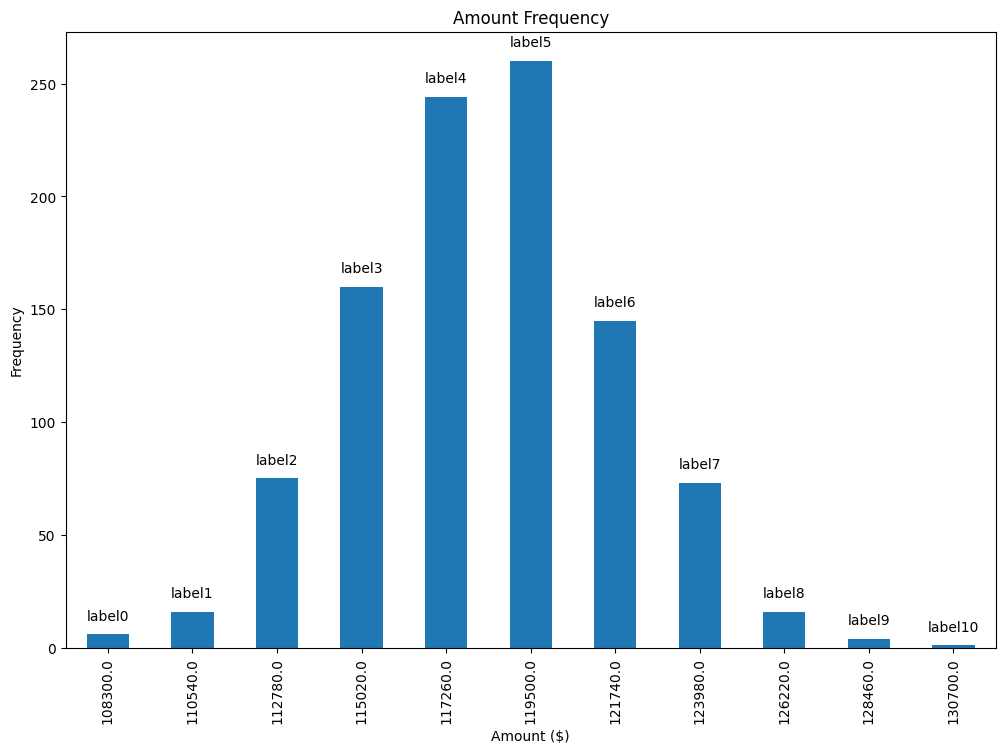

In [ ]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [ ]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [9.04, 10.89, 10.49, 14.74, 12.58, 12.1, 12.9])

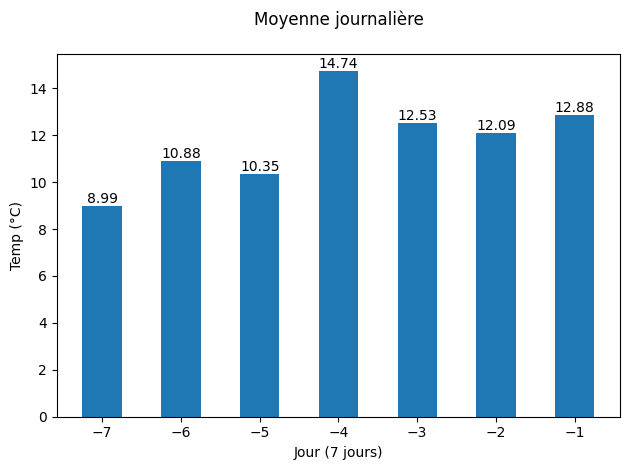

In [ ]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )



In [ ]:
labels

[8.99, 10.88, 10.35, 14.74, 12.53, 12.09, 12.88]

In [ ]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([12.33000000000004,
  12.54000000000002,
  12.980000000000018,
  13.660000000000023,
  14.610000000000014,
  15.060000000000002,
  14.54000000000002,
  13.900000000000034,
  13.240000000000007,
  12.629999999999995,
  12.560000000000002,
  12.110000000000014,
  12.390000000000043,
  11.939999999999998,
  11.879999999999995,
  11.900000000000034,
  12.140000000000043,
  12.400000000000034,
  12.189999999999998,
  11.700000000000044,
  12.350000000000025,
  12.900000000000034,
  13.850000000000025,
  14.710000000000036],
 296.99000000000046)

In [ ]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

296.9900000000004

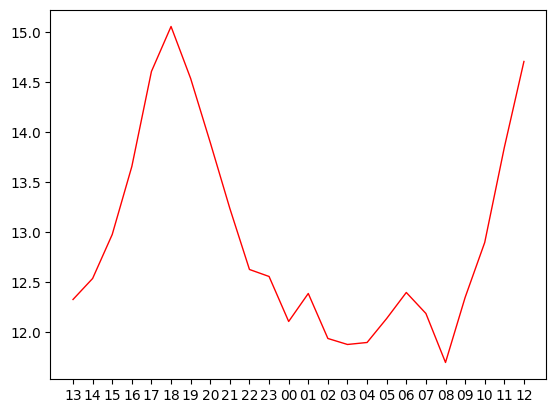

In [ ]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [ ]:
data.tail()


,temp,hours,dates,variation,heures
10991,11.70,19800.333333,18/03/24 08:00:00,-0.49,08
10992,12.35,19800.375000,18/03/24 09:00:00,0.65,09
10993,12.90,19800.416667,18/03/24 10:00:00,0.55,10
10994,13.85,19800.458333,18/03/24 11:00:00,0.95,11
10995,14.71,19800.500000,18/03/24 12:00:00,0.86,12


In [ ]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([15.060000000000002, 12.390000000000043, 12.400000000000034],
 [12.33000000000004,
  12.110000000000014,
  11.879999999999995,
  11.700000000000044],
 3,
 4)

In [ ]:
_diff=[M-m for M,m in zip(_max, _min)]

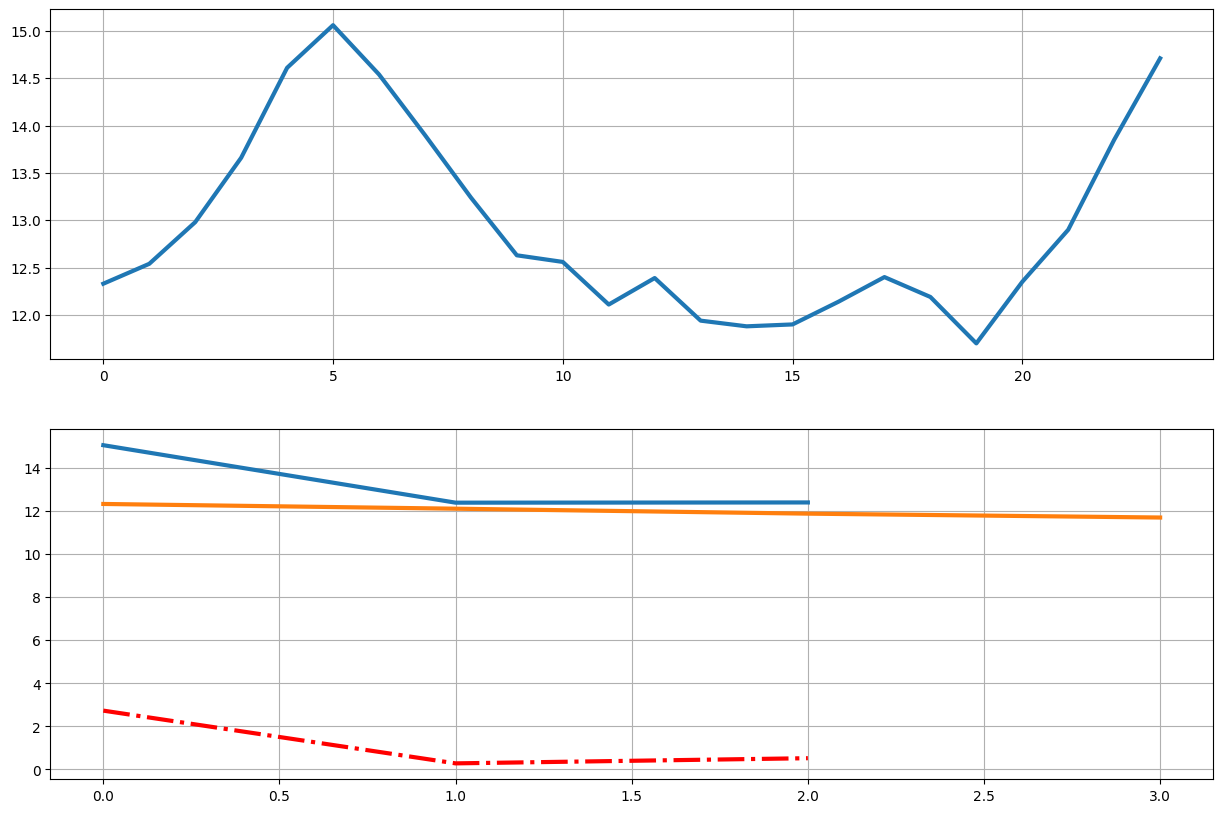

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[1] 1 [] 0
[] 0 [] 0


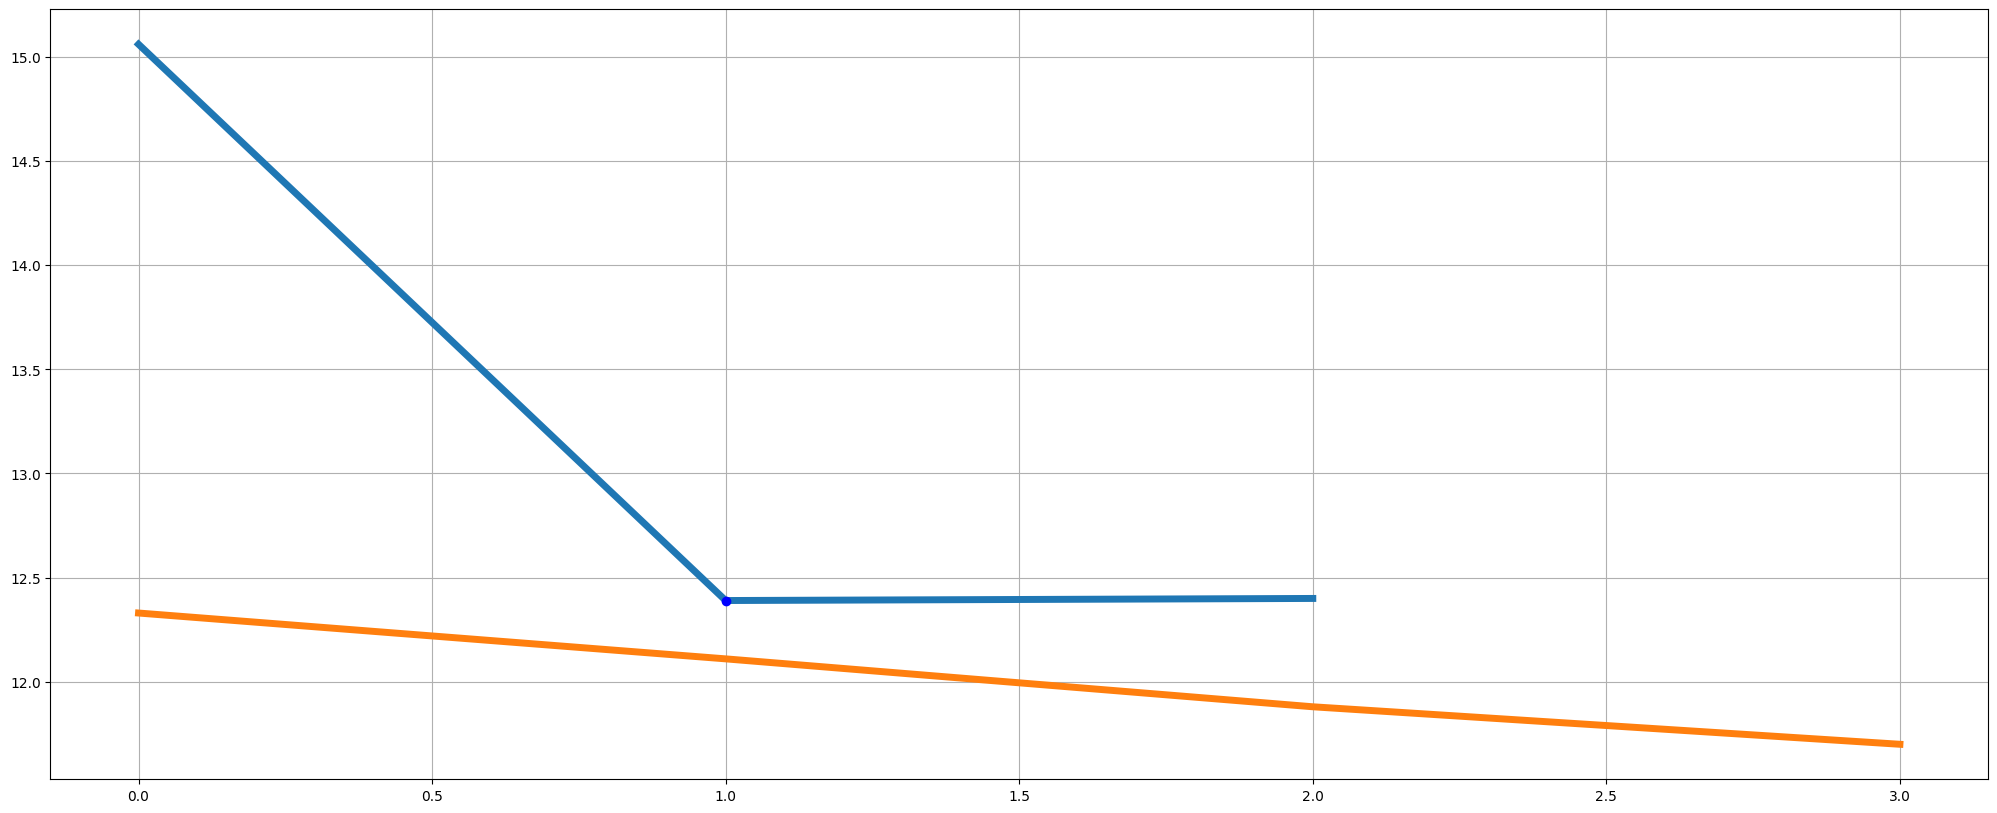

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [ ]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [ ]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [ ]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [ ]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [ ]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

[ 5 15] 2 [ 2 10 18] 3


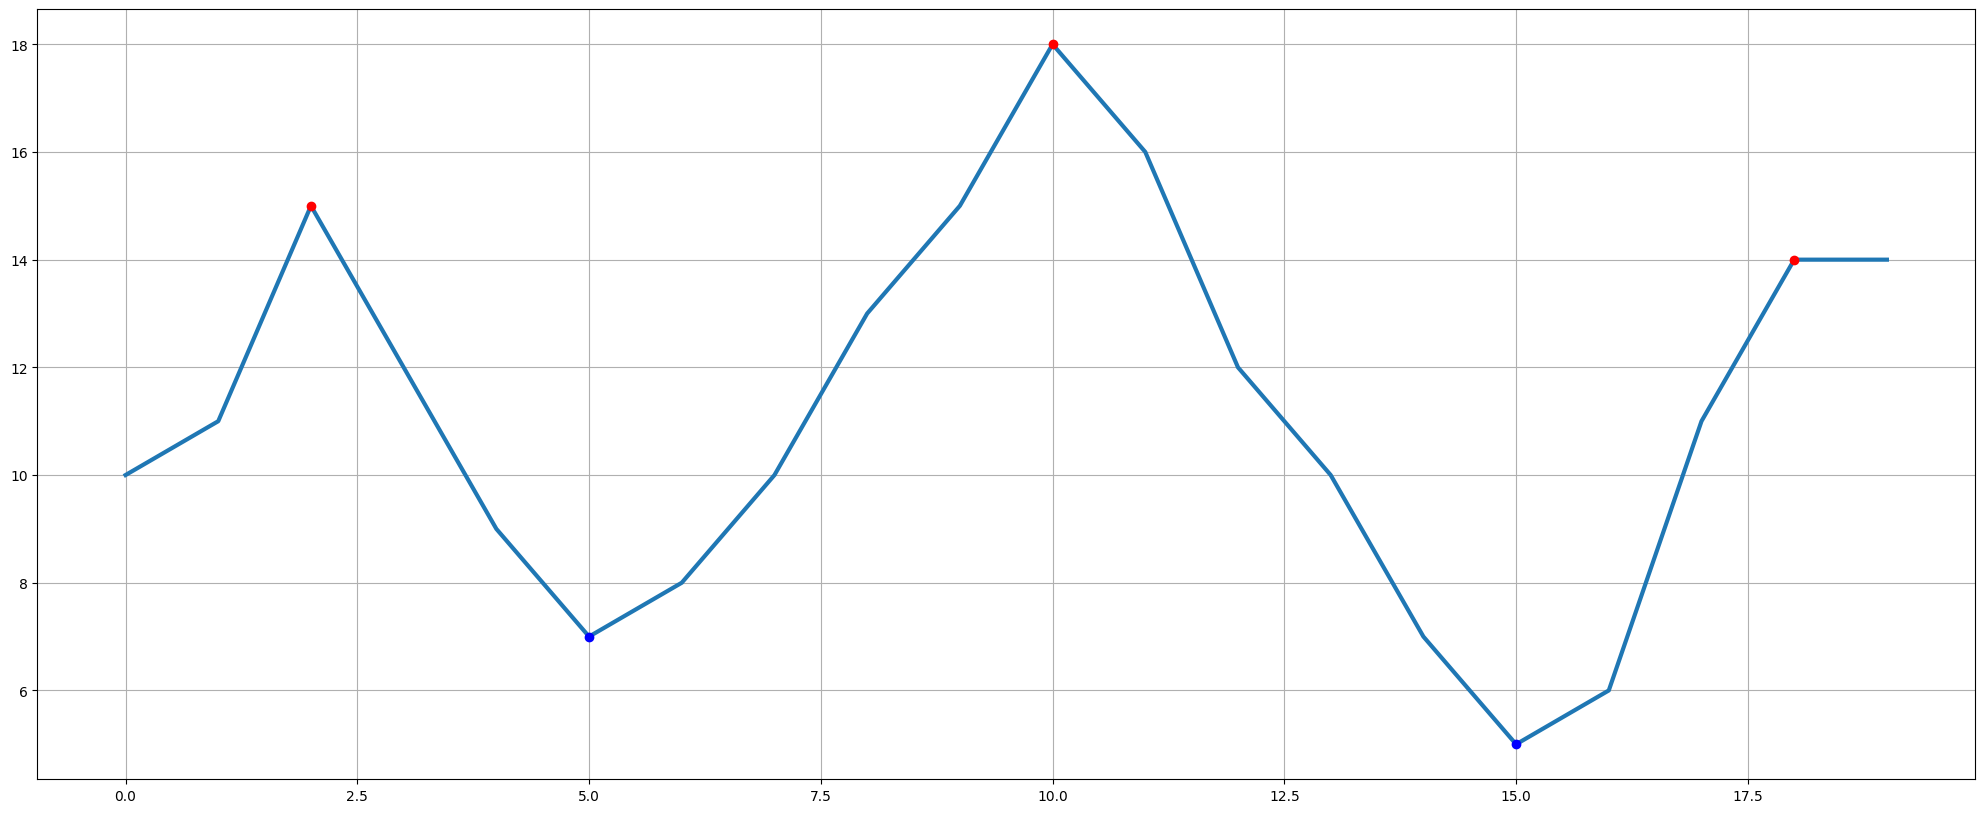

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [ ]:
date_time_str,days,interval

('16/12/22 9:00:00', 15, 12)

## last records

In [ ]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
10828,12.20,7.838333
10829,12.00,7.980833
10830,11.29,8.090833
10831,11.08,8.134583
10832,9.79,8.151250
...,...,...
10991,11.70,12.483333
10992,12.35,12.548333
10993,12.90,12.630000
10994,13.85,12.723333


<Axes: >

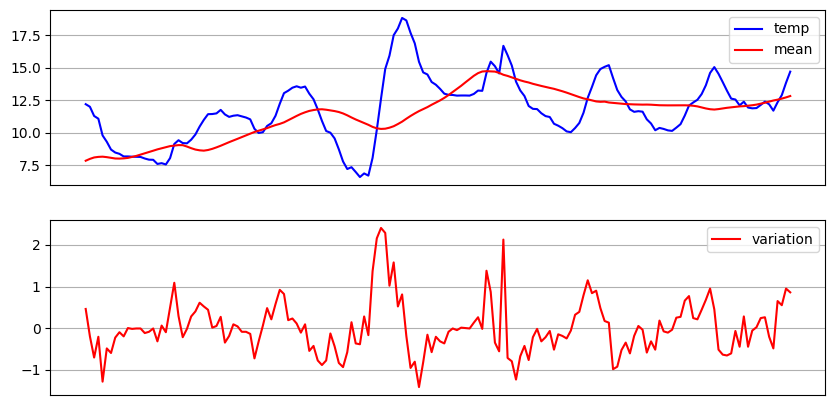

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [ ]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(18.850000000000023, 6.580000000000041)

In [ ]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [ ]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 15.14 7.23 7.91
J -28 11.65 9.26 2.39
J -27 11.17 6.63 4.54
J -26 9.92 6.67 3.25
J -25 12.49 9.14 3.35
J -24 13.19 4.75 8.44
J -23 8.89 3.73 5.16
J -22 8.68 4.93 3.75
J -21 9.68 7.22 2.46
J -20 9.47 4.76 4.71
J -19 9.12 1.42 7.7
J -18 10.54 7.37 3.17
J -17 10.38 4.83 5.55
J -16 10.44 4.93 5.51
J -15 8.35 5.13 3.22
J -14 9.42 1.36 8.06
J -13 12.06 6.48 5.58
J -12 10.24 5.2 5.04
J -11 10.51 2.32 8.19
J -10 13.15 3.17 9.98
J -9 13.59 6.34 7.25
J -8 13.83 7.17 6.66
J -7 11.74 5.44 6.3
J -6 12.2 7.55 4.65
J -5 13.05 9.18 3.87
J -4 14.92 6.58 8.34
J -3 18.85 12.86 5.99
J -2 16.7 10.04 6.66
J -1 15.21 10.14 5.07
J 0 15.06 11.7 3.36


<Axes: >

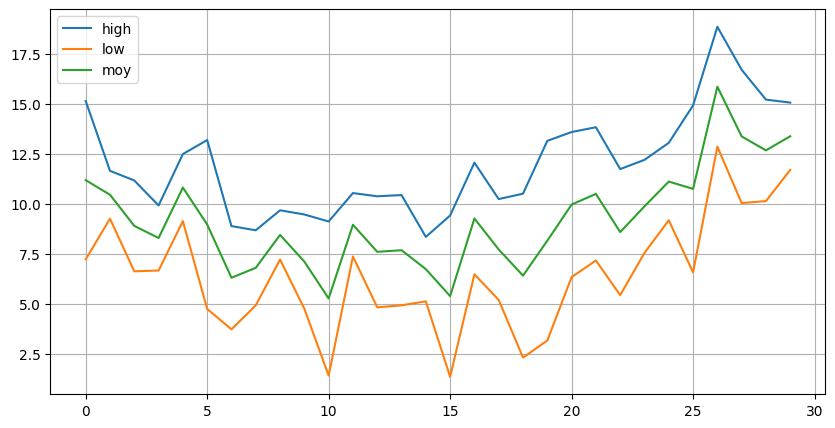

In [ ]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [ ]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[15.14, 13.19, 9.68, 10.54, 10.44, 12.06, 13.83, 18.85]

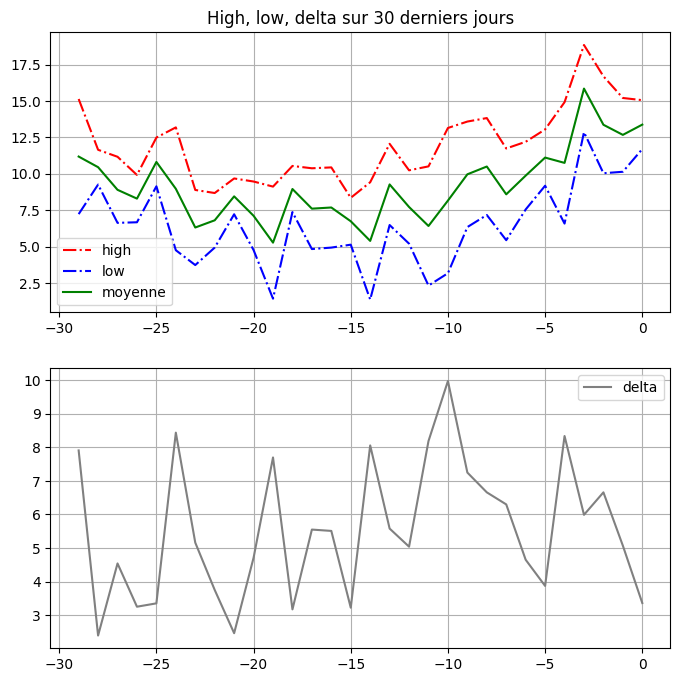

In [ ]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       10996 non-null  float64
 1   hours      10996 non-null  float64
 2   dates      10996 non-null  object 
 3   variation  10995 non-null  float64
 4   heures     10996 non-null  object 
dtypes: float64(3), object(2)
memory usage: 429.7+ KB


In [ ]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [ ]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [ ]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

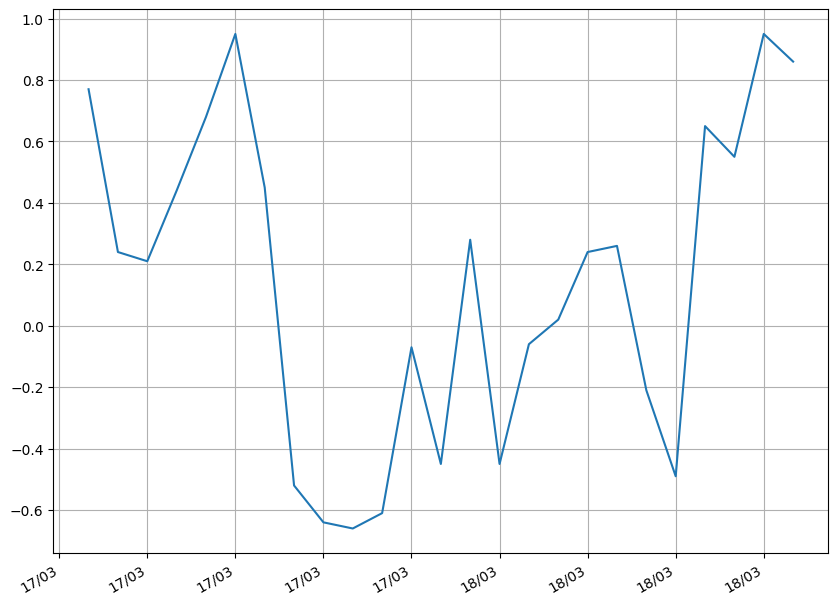

In [ ]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [ ]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 18.850000000000023, 1.3600000000000136)

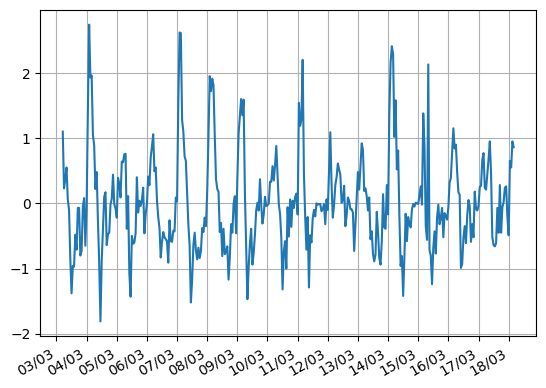

In [ ]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [ ]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(18.850000000000023,
 3771     22/05/23 12:00:00
 4730     01/07/23 11:00:00
 5711     11/08/23 08:00:00
 5824     16/08/23 01:00:00
 6360     07/09/23 09:00:00
 10903    14/03/24 16:00:00
 Name: dates, dtype: object)

In [ ]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(1.3600000000000136,
 937      24/01/23 10:00:00
 960      25/01/23 09:00:00
 10655    04/03/24 08:00:00
 Name: dates, dtype: object)

In [ ]:
data.tail(w)['temp'].describe()

count    360.000000
mean       9.604417
std        3.360584
min        1.360000
25%        7.222500
50%        9.745000
75%       12.082500
max       18.850000
Name: temp, dtype: float64

In [ ]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('18/03/24 13:03:53', 14.71)

In [ ]:
# current date and time
ts = datetime.timestamp(today)
ts

1710763433.420729